k_State HOnor Code: "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

    
Your Name: Bhaskar Aryal

## Section 1. Exploratory Data Analysis - Correlation (Healthcare Analytics)


In [2]:
# import packages 
import pingouin as pg
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy import stats

from IPython.display import Image

import warnings
warnings.filterwarnings("ignore") 

In [3]:
# improt data 
df = pd.read_csv("data/Chapter09DataSet_Training.csv")
df.head(2)

,Age,Marital_Status,Gender,Weight_Category,Cholesterol,Stress_Management,Trait_Anxiety,2nd_Heart_Attack
0,60,2,0,1,150,1,50,Yes
1,69,2,1,1,170,0,60,Yes


### Question 1
#### Identify the numerical and categorical variables in the provided dataset. What are they?

In [4]:
# inspect the data 
df.dtypes

Age                   int64
Marital_Status        int64
Gender                int64
Weight_Category       int64
Cholesterol           int64
Stress_Management     int64
Trait_Anxiety         int64
2nd_Heart_Attack     object
dtype: object

In [5]:
# inspect unique levels in each variable
df.nunique()

Age                  31
Marital_Status        4
Gender                2
Weight_Category       3
Cholesterol          55
Stress_Management     2
Trait_Anxiety        10
2nd_Heart_Attack      2
dtype: int64

#### Answer to Question 1:

The numerical variables in the dataset are: Age, Cholesterol and Trait_Anxiety. 
The categorical variables are Marital_Status, Gender, Weight_Category, Stress_Management and 2nd_Heart_Attack. 

y variable or the response variable is 2nd_heart_attack
All other variables are predictor variables / X variables  

### Question 2
#### Conduct a correlation analysis on the dataset. Given that the dataset contains categorical values, what  types of data transformations did you perform to facilitate the analysis?

In [6]:
# Convert categorical variables to dummy numerical for correlation analysis


In [7]:
df = pd.get_dummies(df, columns=['Marital_Status', 'Gender', 'Weight_Category', 'Stress_Management', '2nd_Heart_Attack'])
df.head()

,Age,Cholesterol,Trait_Anxiety,Marital_Status_0,Marital_Status_1,Marital_Status_2,Marital_Status_3,Gender_0,Gender_1,Weight_Category_0,Weight_Category_1,Weight_Category_2,Stress_Management_0,Stress_Management_1,2nd_Heart_Attack_No,2nd_Heart_Attack_Yes
0,60,150,50,0,0,1,0,1,0,0,1,0,0,1,0,1
1,69,170,60,0,0,1,0,0,1,0,1,0,1,0,0,1
2,52,174,35,0,1,0,0,1,0,1,0,0,0,1,1,0
3,66,169,60,0,0,1,0,0,1,0,1,0,1,0,0,1
4,70,237,65,0,0,0,1,1,0,0,1,0,1,0,0,1


In [8]:
# correlation analysis 
df.corr(numeric_only=True)

,Age,Cholesterol,Trait_Anxiety,Marital_Status_0,Marital_Status_1,Marital_Status_2,Marital_Status_3,Gender_0,Gender_1,Weight_Category_0,Weight_Category_1,Weight_Category_2,Stress_Management_0,Stress_Management_1,2nd_Heart_Attack_No,2nd_Heart_Attack_Yes
Age,1.000000,0.395331,0.667169,0.000689,-0.466092,0.196552,0.336010,-0.076195,0.076195,-0.502928,0.340887,0.159133,0.359295,-0.359295,-0.499182,0.499182
Cholesterol,0.395331,1.000000,0.579485,-0.303985,-0.065453,0.104248,0.135366,-0.191354,0.191354,-0.375862,0.104245,0.289266,0.405735,-0.405735,-0.506531,0.506531
Trait_Anxiety,0.667169,0.579485,1.000000,-0.109359,-0.136640,0.024721,0.208677,-0.082007,0.082007,-0.448879,0.083823,0.391489,0.321362,-0.321362,-0.482548,0.482548
Marital_Status_0,0.000689,-0.303985,-0.109359,1.000000,-0.186989,-0.205003,-0.113822,-0.128907,0.128907,-0.175412,0.295718,-0.144607,-0.278711,0.278711,0.244500,-0.244500
Marital_Status_1,-0.466092,-0.065453,-0.136640,-0.186989,1.000000,-0.622918,-0.345857,0.253841,-0.253841,0.362441,-0.295528,-0.058252,-0.179056,0.179056,0.441389,-0.441389
Marital_Status_2,0.196552,0.104248,0.024721,-0.205003,-0.622918,1.000000,-0.379176,-0.368523,0.368523,-0.302609,0.026062,0.298377,0.260109,-0.260109,-0.602321,0.602321
Marital_Status_3,0.336010,0.135366,0.208677,-0.113822,-0.345857,-0.379176,1.000000,0.234997,-0.234997,0.040555,0.158687,-0.223525,0.061928,-0.061928,0.069830,-0.069830
Gender_0,-0.076195,-0.191354,-0.082007,-0.128907,0.253841,-0.368523,0.234997,1.000000,-1.000000,0.465250,-0.196746,-0.281433,-0.241320,0.241320,0.317746,-0.317746
Gender_1,0.076195,0.191354,0.082007,0.128907,-0.253841,0.368523,-0.234997,-1.000000,1.000000,-0.465250,0.196746,0.281433,0.241320,-0.241320,-0.317746,0.317746
Weight_Category_0,-0.502928,-0.375862,-0.448879,-0.175412,0.362441,-0.302609,0.040555,0.465250,-0.465250,1.000000,-0.593171,-0.412193,-0.299208,0.299208,0.666185,-0.666185


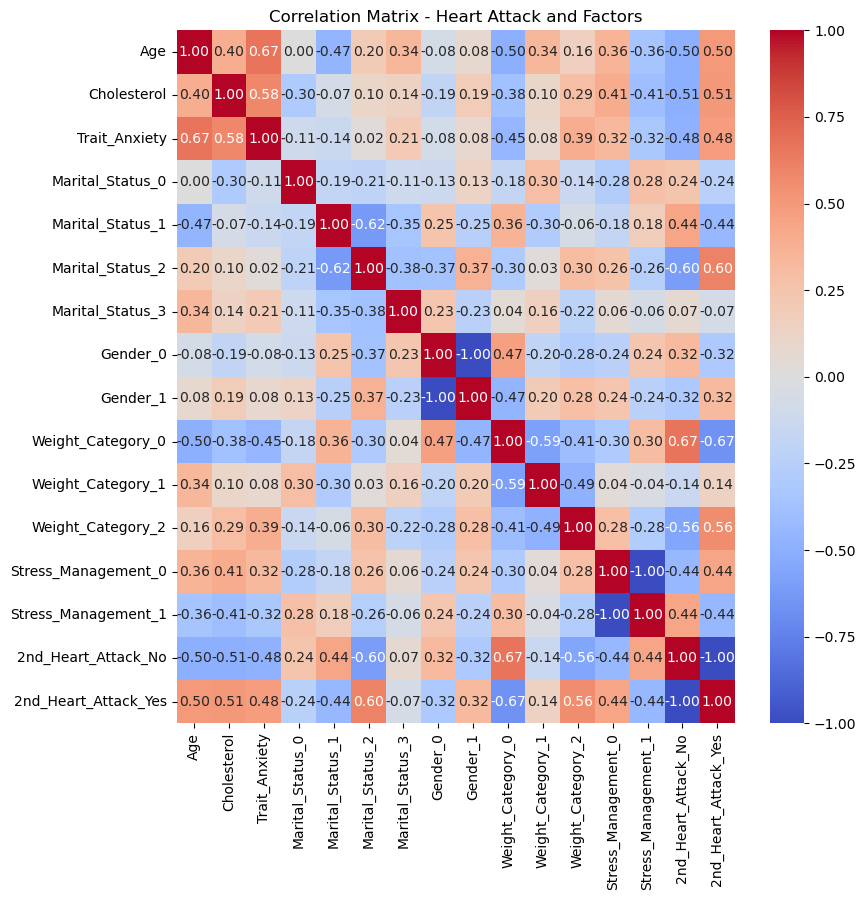

In [9]:
# Heat map for correlation visualization 
# correlation plot

# define the figsize 
plt.figure(figsize=(9, 9))

# create heatmap
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')

# add axes and titles
plt.title("Correlation Matrix - Heart Attack and Factors")  # Add a title to the heatmap
#plt.xlabel("Indicators")  # X-axis title
#plt.ylabel("Indicators")  # Y-axis title

plt.show()

 - To facilitate the correlation analysis, I converted the categorical variables into dummy numerical variables also sometimes referred to as indicator variables. It involves converting each level in the categorical variable into a new binary (0/False or 1/True) value.

### Question 3
#### Interpret the results of the correlation analysis. What insights were you able to derive?


The following insights can be drawn from the correlation analysis: 

- Trait_Anxiety and Age have a strong positive correlation (0.67). This indicates that aged people have might struggle with their abilities to cope up with natural anxiety

- The correlation coefficient between Divorced individual and second heart attack is positive and strong (0.60). This indicates, divorcees are at a greater risk of second heart attack. Conversly, married individuals seem to be less prone to a second heart attack as indicated by a fairly strong negative correlation(-0.40). 

- People who have attened Stress Management Training program seem less likely to have a second heart attack (negative correlation of -0.44)

- People with normal weight are less likely to enconter a second heart attack (strong negative correlation of -0.67). Similarly, obese people have greater probability to have a second heart attack as indicated by a strong positive correlation of 0.56. 

- People with higher cholestrol levels are more prone to second heart attacks (strong postive correlaton of 0.51)


### Question 4 
#### Characterize the individuals who are at higher risk of experiencing a second heart attack. What common traits or characteristics do they share?

Indiviudals who are at higher risk of experiencing second heart attack can be characterized with the following common traits: 

- Most of these people have not attended the Stress Management course 
- Their weight is categorized as obese 
- It is likely that they are divorced 
- These individuals have high cholestrol levels 
- The person's age tends to be older/higher 

### Question 5  
#### Based on your analysis, what general recommendations can you offer to the healthcare provider?

Based on the analysis, the following recommendations can be provided to the health care provider: 

- They should recommend the Stress Management course to their clients, as it apperas that people who attended the course are less likely to encounter a second heart attack.

- Weight management should be promoted as obese people are more likely to enconter a second stroke whereas, people with normal weight are much less likely.

- The service provider should regularly monitor the cholestrol level of their clients.

## Section 2. Statistics 101 – Hypothesis Testing (Website Analytics)

In [10]:
# Read the data
web = pd.read_csv("data/web_page_data.csv")
web.head()

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


### Question 1 
#### How many people visited each page (Page A, Page B) What is the average visit time for Page A and Page B?

In [11]:
# Average visit time spend on each page 
average_time = round(web.groupby('Page')['Time'].mean(), 2)
average_time

Page
Page A    1.26
Page B    1.62
Name: Time, dtype: float64

In [12]:
print('The average visit time for page A is: ', average_time[0])  
print('The average visit time for page B is: ', average_time[1]) 

The average visit time for page A is:  1.26
The average visit time for page B is:  1.62


In [13]:
# Number of people visting each page 
visitor_count = web['Page'].value_counts()
visitor_count

Page A    21
Page B    15
Name: Page, dtype: int64

In [14]:
print('The number of visitors on page A is: ', visitor_count[0])  
print('The number of visitors on page B is: ', visitor_count[1]) 

The number of visitors on page A is:  21
The number of visitors on page B is:  15


### Question 2 
#### Visualize the distribution of Time for Page A and Page B in a single figure.

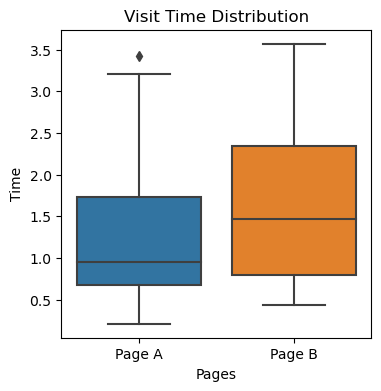

In [15]:
# visualization of time for both pages with a boxplot 
plt.figure(figsize = (4, 4))

sns.boxplot(data=web, x="Page", y="Time");

# add axes and titles
plt.title("Visit Time Distribution")  # Add a title to the heatmap
plt.xlabel("Pages")  # X-axis title
plt.ylabel("Time")  # Y-axis title

plt.show()

### Question 3
#### What general findings can be drawn from the steps above?

Gneeral findings include:
- People spend more time in Page B compared to Page A, roughly 22 percent
- Page A has 28 percent more visitors than Page B

### Question 4 
#### Given that there is some difference between Page A and Page B, perform an appropriate test to determine  if these differences are statistically significant.
##### a. State the hypothesis you are testing.
##### b. Explain the results of the test

In [16]:
# comparing two groups
A = web[web['Page'] == 'Page A']['Time']
B = web[web['Page'] == 'Page B']['Time']

two_sample = stats.ttest_ind(A, B)   #using scipy package
two_sample

Ttest_indResult(statistic=-1.1237042154424823, pvalue=0.26901024363926024)

In [17]:
# alternative package for comparing two groups 
#using pingouin package  https://pingouin-stats.org/generated/pingouin.ttest.html#pingouin.ttest

pg.ttest(A, B, correction=False).round(2)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.12,34,two-sided,0.27,"[-1.0, 0.29]",0.38,0.53,0.19


In [18]:
print("The t-statistic is %.3f and the p-value is %.3f." % two_sample,)

The t-statistic is -1.124 and the p-value is 0.269.


A.
- Null Hypothesis: There is no difference between the visit times of Page A and Page B
- Alternative Hypothesis: The visit times between Page A and Page B are different from each other

B.
- The p-value of the t-test is 0.269, hence we fail to reject the null hypothesis. The difference between the visit times of Page A and Page B is not statistically significant at significance level of 0.05. 

### Question 5 

#### For the second dataset, how many people visited each of these pages? What is the average visit time for each page?

In [21]:
four = pd.read_csv("data/four_sessions.csv")
four.head()

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172


In [22]:
# Average visit time spend on each page 
average_time = round(four.groupby('Page')['Time'].mean(), 2)
average_time

Page
Page 1    172.8
Page 2    182.6
Page 3    175.6
Page 4    164.6
Name: Time, dtype: float64

In [23]:
# Number of people visting each page 
visitor_count = four['Page'].value_counts()
visitor_count

Page 1    5
Page 2    5
Page 3    5
Page 4    5
Name: Page, dtype: int64

### Question 6 
#### Visualize the distribution of visit times for each page in a single figure.

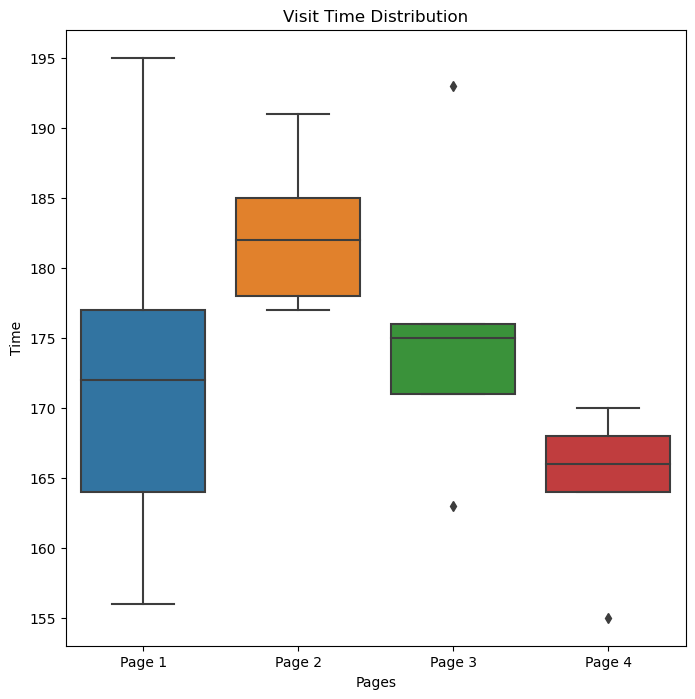

In [24]:
# visualization of time for both pages with a boxplot 
plt.figure(figsize = (8, 8))

sns.boxplot(data=four, x="Page", y="Time");

# add axes and titles
plt.title("Visit Time Distribution")  # Add a title to the heatmap
plt.xlabel("Pages")  # X-axis title
plt.ylabel("Time")  # Y-axis title

plt.show()

### Question 7
### What general findings can be drawn from these steps?

General findings include:
- People spend more time on Page 2 followed by Page 3 then Page 4, and Page 1. 
- On average, people spend 11 percent more time in page 2 when compared to Page 1. 
- The visit time for Page 1 has greater variability when compared with other pages. 

### Question 8 
#### Perform an appropriate test to determine if the observed differences between the pages are statistically significant
##### a. State the hypothesis you are testing.
##### b. Explain the results of the test

A.
- Null Hypothesis: There is no difference between the visit times of the four Pages 
- Alternative Hypothesis: The visit times between four pages are different for at least one pair

In [39]:
 # comparing two groups
Page_1 = four[four['Page'] == 'Page 1']['Time']
Page_2 = four[four['Page'] == 'Page 2']['Time']
Page_3 = four[four['Page'] == 'Page 3']['Time']
Page_4 = four[four['Page'] == 'Page 4']['Time']


f_val, p_val = stats.f_oneway(Page_1, Page_2, Page_3, Page_4) 
print("One-way ANOVA P =", p_val)

One-way ANOVA P = 0.0775862152580146


B.
- The p-value of the t-test is 0.07 (> 0.05), hence we fail to reject the null hypothesis. The difference between the visit times of Pages is not statistically significant at significance level of 0.05. 

In [36]:
# post-hoc test 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(four['Time'], four['Page']))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Page 1 Page 2      9.8 0.4379  -8.3984 27.9984  False
Page 1 Page 3      2.8 0.9706 -15.3984 20.9984  False
Page 1 Page 4     -8.2 0.5825 -26.3984  9.9984  False
Page 2 Page 3     -7.0 0.6943 -25.1984 11.1984  False
Page 2 Page 4    -18.0 0.0531 -36.1984  0.1984  False
Page 3 Page 4    -11.0 0.3416 -29.1984  7.1984  False
-----------------------------------------------------


From the pairwise post-hoc test alos we do not see any significant differences between the Page groups